## EDA

In [39]:
#importing necessary libraries

import numpy as np                 
import pandas as pd               
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from matplotlib import pyplot

In [40]:
data = pd.read_csv("users.csv")


In [41]:
data.shape
# 10,000 rows and 29 columns

(10000, 29)

In [42]:
data.head()

,cell,city,country,coordinates,dob,email,first_name,full_name,gender,id,...,nat,password,phone,postcode,registered,registered_age,state,street,username,zipcode
0,86844133,Aarhus,Denmark,"{'latitude': '-27.2993', 'longitude': '-166.99...",1993-01-13T15:08:05.786Z,andreas.petersen@example.com,Andreas,Andreas Petersen,male,"{'type': 'CPR', 'number': '130193-1307'}",...,DK,sushi,78178106,98297,2014-11-28T08:02:33.528Z,7,Hovedstaden,3749 Danmarksgade,lazypanda650,98297
1,21798697,Rønnede,Denmark,"{'latitude': '71.1049', 'longitude': '51.7705'}",1963-02-18T09:27:54.515Z,andrea.mortensen@example.com,Andrea,Andrea Mortensen,female,"{'type': 'CPR', 'number': '180263-1138'}",...,DK,12345678,82788871,21722,2011-08-01T14:31:46.077Z,10,Hovedstaden,9435 Morelvej,orangedog426,21722
2,42940164,Hornbæk,Denmark,"{'latitude': '-56.6625', 'longitude': '-49.5258'}",1970-05-03T08:54:43.828Z,josefine.nielsen@example.com,Josefine,Josefine Nielsen,female,"{'type': 'CPR', 'number': '030570-4011'}",...,DK,down,66933663,46566,2012-09-23T01:15:07.931Z,9,Danmark,7343 Tjørnebjerg,beautifulkoala516,46566
3,(832)-210-2932,West Jordan,United States,"{'latitude': '-35.5890', 'longitude': '-146.82...",1975-05-26T11:09:54.151Z,eleanor.cox@example.com,Eleanor,Eleanor Cox,female,"{'type': 'SSN', 'number': '388-69-0621'}",...,US,puff,(113)-462-6318,73750,2015-06-16T21:38:49.101Z,6,Kentucky,4533 Valley View Ln,sadrabbit934,73750
4,0178-4102666,Waghäusel,Germany,"{'latitude': '-12.8864', 'longitude': '-15.1739'}",1973-12-07T11:30:12.588Z,hubertine.bethke@example.com,Hubertine,Hubertine Bethke,female,"{'type': '', 'number': None}",...,DE,wally,0424-7111422,86121,2016-06-24T00:07:25.002Z,5,Nordrhein-Westfalen,1434 Industriestraße,goldenelephant678,86121


In [43]:
data.isnull().sum()
#checking if we have NaN values

cell                 0
city                 0
country              0
coordinates          0
dob                  0
email                0
first_name           0
full_name            0
gender               0
id                   0
id_number         3518
id_type           3518
info                 0
last_name            0
login_md5            0
login_salt           0
login_sha1           0
login_sha256         0
login_uuid           0
nat                  0
password             0
phone                0
postcode             0
registered           0
registered_age       0
state                0
street               0
username             0
zipcode              0
dtype: int64

In [44]:
data.dropna(inplace=True)
data.isnull().sum()

cell              0
city              0
country           0
coordinates       0
dob               0
email             0
first_name        0
full_name         0
gender            0
id                0
id_number         0
id_type           0
info              0
last_name         0
login_md5         0
login_salt        0
login_sha1        0
login_sha256      0
login_uuid        0
nat               0
password          0
phone             0
postcode          0
registered        0
registered_age    0
state             0
street            0
username          0
zipcode           0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6482 entries, 0 to 9998
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cell            6482 non-null   object
 1   city            6482 non-null   object
 2   country         6482 non-null   object
 3   coordinates     6482 non-null   object
 4   dob             6482 non-null   object
 5   email           6482 non-null   object
 6   first_name      6482 non-null   object
 7   full_name       6482 non-null   object
 8   gender          6482 non-null   object
 9   id              6482 non-null   object
 10  id_number       6482 non-null   object
 11  id_type         6482 non-null   object
 12  info            6482 non-null   object
 13  last_name       6482 non-null   object
 14  login_md5       6482 non-null   object
 15  login_salt      6482 non-null   object
 16  login_sha1      6482 non-null   object
 17  login_sha256    6482 non-null   object
 18  login_uu

We have only one numeric variable:  **registered_age**


In [47]:
data.describe() 

,registered_age
count,6482.000000
mean,10.489972
std,5.021968
min,2.000000
25%,6.000000
50%,10.000000
75%,15.000000
max,19.000000


In [48]:
data.columns

Index(['cell', 'city', 'country', 'coordinates', 'dob', 'email', 'first_name',
       'full_name', 'gender', 'id', 'id_number', 'id_type', 'info',
       'last_name', 'login_md5', 'login_salt', 'login_sha1', 'login_sha256',
       'login_uuid', 'nat', 'password', 'phone', 'postcode', 'registered',
       'registered_age', 'state', 'street', 'username', 'zipcode'],
      dtype='object')

In [49]:
# Separate thevariable by its categories
print(data['city'].unique())
print(data['country'].unique())
print(data['gender'].unique())
print(data['nat'].unique())

print(data['dob'].unique())
print(data['state'].unique())
print(data['zipcode'].unique())


['Aarhus' 'Rønnede' 'Hornbæk' ... 'Wynau' 'Zwartewaterland' 'Raleigh']
['Denmark' 'United States' 'Netherlands' 'France' 'Australia'
 'Switzerland' 'Norway' 'United Kingdom' 'Ireland' 'Spain' 'Finland']
['male' 'female']
['DK' 'US' 'NL' 'FR' 'AU' 'CH' 'NO' 'GB' 'IE' 'ES' 'FI']
['1993-01-13T15:08:05.786Z' '1963-02-18T09:27:54.515Z'
 '1970-05-03T08:54:43.828Z' ... '1964-04-16T02:08:51.009Z'
 '1953-05-23T12:50:44.473Z' '1977-05-27T13:15:37.325Z']
['Hovedstaden' 'Danmark' 'Kentucky' 'Zuid-Holland' 'Eure-et-Loir'
 'New Mexico' 'Australian Capital Territory' 'Queensland' 'Fribourg'
 'Washington' 'Ohio' 'Sør-Trøndelag' 'Grampian' 'Mayo' 'Jura' 'Galicia'
 'Cantabria' 'Dublin City' 'Cork' 'Cataluña' 'Zeeland' 'Pas-de-Calais'
 'Møre og Romsdal' 'Syddanmark' 'Idaho' 'Luzern' 'New South Wales'
 'Sjælland' 'Derbyshire' 'Hertfordshire' 'Oise' 'Extremadura' 'Florida'
 'Oppland' 'Troms - Romsa' 'Pirkanmaa' 'Åland' 'Indre' 'Tavastia Proper'
 'Rogaland' 'County Tyrone' 'Roscommon' 'Thurgau' 'Wicklow' 'L

In [50]:
data['dob'].value_counts()

1979-12-27T08:43:48.545Z    1
1964-02-01T05:15:47.300Z    1
1992-12-02T00:03:04.826Z    1
1977-08-21T14:41:31.178Z    1
1949-01-16T09:36:03.683Z    1
                           ..
1973-08-01T14:20:19.351Z    1
1951-10-17T14:21:26.493Z    1
1973-11-25T01:20:36.444Z    1
1972-10-21T21:17:59.718Z    1
1970-04-20T19:21:15.421Z    1
Name: dob, Length: 6482, dtype: int64

In [51]:
en_data = pd.get_dummies(data, columns = ['city', 'country','gender', 'state','zipcode' ])
print(en_data)

                cell                                        coordinates  \
0           86844133  {'latitude': '-27.2993', 'longitude': '-166.99...   
1           21798697    {'latitude': '71.1049', 'longitude': '51.7705'}   
2           42940164  {'latitude': '-56.6625', 'longitude': '-49.5258'}   
3     (832)-210-2932  {'latitude': '-35.5890', 'longitude': '-146.82...   
5     (514)-486-8499  {'latitude': '-31.7587', 'longitude': '-31.6096'}   
...              ...                                                ...   
9992    081-843-8830  {'latitude': '-65.3326', 'longitude': '-10.6884'}   
9993  (795)-340-3841    {'latitude': '31.9774', 'longitude': '47.8871'}   
9994     645-085-726  {'latitude': '-43.0999', 'longitude': '-161.55...   
9995    0772-477-654   {'latitude': '-46.3901', 'longitude': '57.8306'}   
9998  (576)-721-1868  {'latitude': '22.1019', 'longitude': '-109.1771'}   

                           dob                         email first_name  \
0     1993-01-13T15:08:0

In [52]:
en_data.head()

,cell,coordinates,dob,email,first_name,full_name,id,id_number,id_type,info,...,zipcode_ZG2 7BF,zipcode_ZH88 6EX,zipcode_ZI72 4FF,zipcode_ZJ71 1LU,zipcode_ZJ7U 6LY,zipcode_ZK5K 4LW,zipcode_ZR1 9QQ,zipcode_ZT0O 3EE,zipcode_ZV6 4WA,zipcode_ZZ02 6EJ
0,86844133,"{'latitude': '-27.2993', 'longitude': '-166.99...",1993-01-13T15:08:05.786Z,andreas.petersen@example.com,Andreas,Andreas Petersen,"{'type': 'CPR', 'number': '130193-1307'}",130193-1307,CPR,"{'seed': '2c80352ada86675e', 'results': 5000, ...",...,0,0,0,0,0,0,0,0,0,0
1,21798697,"{'latitude': '71.1049', 'longitude': '51.7705'}",1963-02-18T09:27:54.515Z,andrea.mortensen@example.com,Andrea,Andrea Mortensen,"{'type': 'CPR', 'number': '180263-1138'}",180263-1138,CPR,"{'seed': '2c80352ada86675e', 'results': 5000, ...",...,0,0,0,0,0,0,0,0,0,0
2,42940164,"{'latitude': '-56.6625', 'longitude': '-49.5258'}",1970-05-03T08:54:43.828Z,josefine.nielsen@example.com,Josefine,Josefine Nielsen,"{'type': 'CPR', 'number': '030570-4011'}",030570-4011,CPR,"{'seed': '2c80352ada86675e', 'results': 5000, ...",...,0,0,0,0,0,0,0,0,0,0
3,(832)-210-2932,"{'latitude': '-35.5890', 'longitude': '-146.82...",1975-05-26T11:09:54.151Z,eleanor.cox@example.com,Eleanor,Eleanor Cox,"{'type': 'SSN', 'number': '388-69-0621'}",388-69-0621,SSN,"{'seed': '2c80352ada86675e', 'results': 5000, ...",...,0,0,0,0,0,0,0,0,0,0
5,(514)-486-8499,"{'latitude': '-31.7587', 'longitude': '-31.6096'}",1951-06-26T15:15:03.685Z,djimmy.altena@example.com,Djimmy,Djimmy Altena,"{'type': 'BSN', 'number': '24749532'}",24749532,BSN,"{'seed': '2c80352ada86675e', 'results': 5000, ...",...,0,0,0,0,0,0,0,0,0,0


In [53]:
data.head()

,cell,city,country,coordinates,dob,email,first_name,full_name,gender,id,...,nat,password,phone,postcode,registered,registered_age,state,street,username,zipcode
0,86844133,Aarhus,Denmark,"{'latitude': '-27.2993', 'longitude': '-166.99...",1993-01-13T15:08:05.786Z,andreas.petersen@example.com,Andreas,Andreas Petersen,male,"{'type': 'CPR', 'number': '130193-1307'}",...,DK,sushi,78178106,98297,2014-11-28T08:02:33.528Z,7,Hovedstaden,3749 Danmarksgade,lazypanda650,98297
1,21798697,Rønnede,Denmark,"{'latitude': '71.1049', 'longitude': '51.7705'}",1963-02-18T09:27:54.515Z,andrea.mortensen@example.com,Andrea,Andrea Mortensen,female,"{'type': 'CPR', 'number': '180263-1138'}",...,DK,12345678,82788871,21722,2011-08-01T14:31:46.077Z,10,Hovedstaden,9435 Morelvej,orangedog426,21722
2,42940164,Hornbæk,Denmark,"{'latitude': '-56.6625', 'longitude': '-49.5258'}",1970-05-03T08:54:43.828Z,josefine.nielsen@example.com,Josefine,Josefine Nielsen,female,"{'type': 'CPR', 'number': '030570-4011'}",...,DK,down,66933663,46566,2012-09-23T01:15:07.931Z,9,Danmark,7343 Tjørnebjerg,beautifulkoala516,46566
3,(832)-210-2932,West Jordan,United States,"{'latitude': '-35.5890', 'longitude': '-146.82...",1975-05-26T11:09:54.151Z,eleanor.cox@example.com,Eleanor,Eleanor Cox,female,"{'type': 'SSN', 'number': '388-69-0621'}",...,US,puff,(113)-462-6318,73750,2015-06-16T21:38:49.101Z,6,Kentucky,4533 Valley View Ln,sadrabbit934,73750
5,(514)-486-8499,Súdwest-Fryslân,Netherlands,"{'latitude': '-31.7587', 'longitude': '-31.6096'}",1951-06-26T15:15:03.685Z,djimmy.altena@example.com,Djimmy,Djimmy Altena,male,"{'type': 'BSN', 'number': '24749532'}",...,NL,highheel,(137)-971-7436,73345,2005-10-12T12:58:43.375Z,16,Zuid-Holland,5781 Debussystraat,blackwolf450,73345


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#print(scaler.fit(en_data))
#print(scaler.transform(en_data))
en_data[en_data.columns] = scaler.fit_transform(en_data[en_data.columns])
print(en_data)


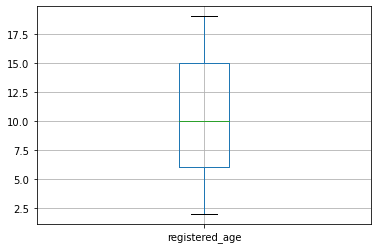

In [54]:
data.boxplot(column =['registered_age'])
plt.show()
#the age of majority of users is between (7;15)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


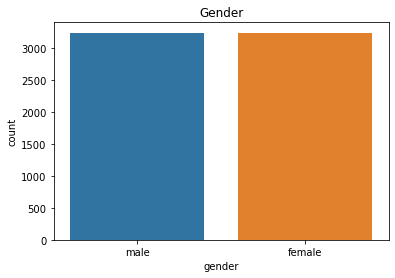

In [63]:

sns.countplot(data.gender)
plt.title("Gender")
plt.show()

In [65]:
data.gender.value_counts() 
#variable gender is balanced

female    3247
male      3235
Name: gender, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


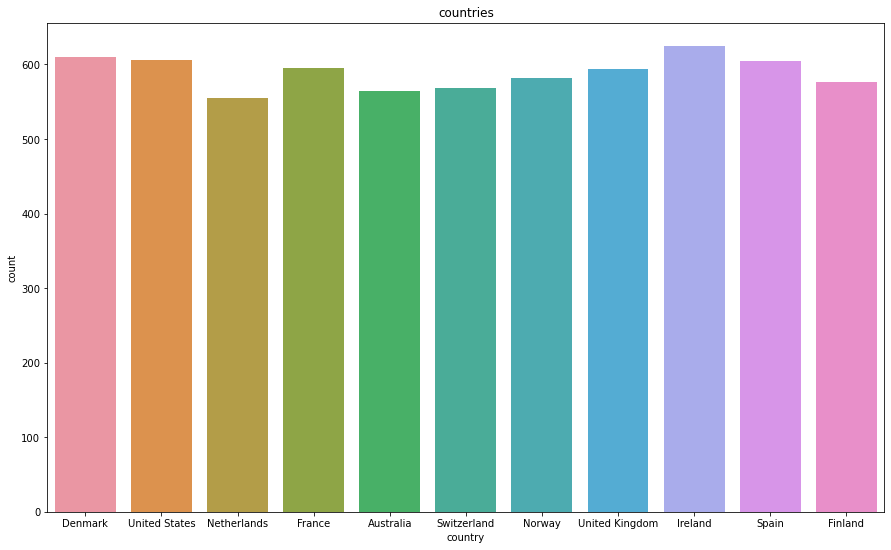

In [55]:

plt.figure(figsize=(15,9))          
sns.countplot(data.country)
plt.title("countries")
plt.show()


In [66]:
data.country.value_counts()
# the number of users by countries

Ireland           625
Denmark           610
United States     606
Spain             605
France            595
United Kingdom    594
Norway            582
Finland           577
Switzerland       569
Australia         564
Netherlands       555
Name: country, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


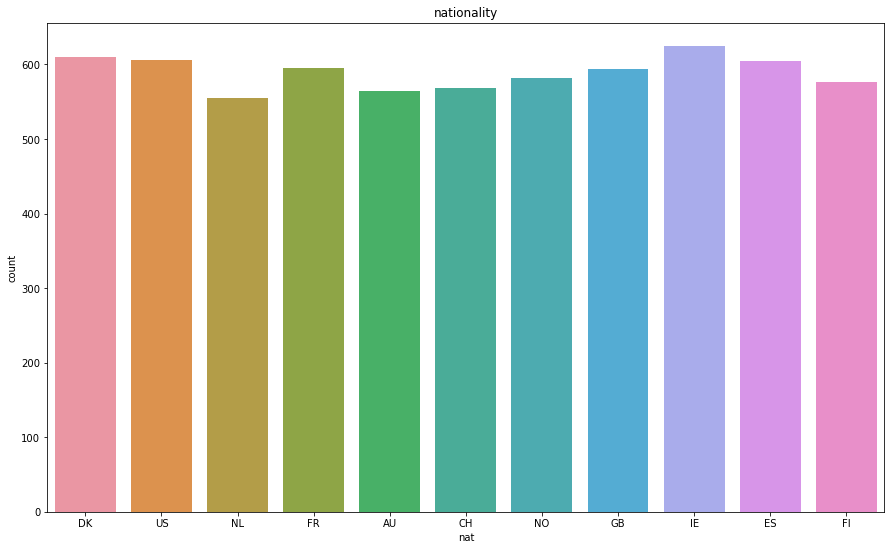

In [68]:
plt.figure(figsize=(15,9))          
sns.countplot(data.nat)
plt.title("nationality")
plt.show()


In [69]:
data.nat.value_counts()

#as we have seen nationaliy and country have the same count

IE    625
DK    610
US    606
ES    605
FR    595
GB    594
NO    582
FI    577
CH    569
AU    564
NL    555
Name: nat, dtype: int64

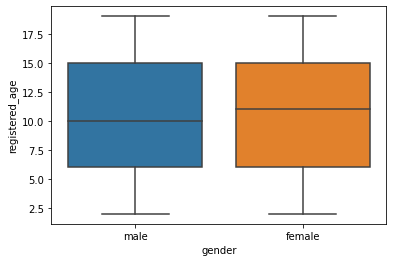

In [58]:
ax = sns.boxplot(x="gender", y="registered_age", data=data)

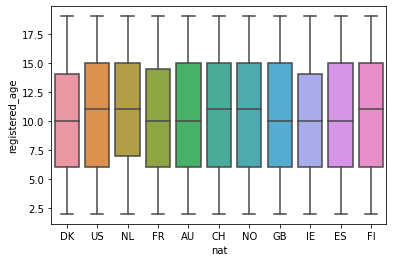

In [59]:
ax = sns.boxplot(x="nat", y="registered_age", data=data)

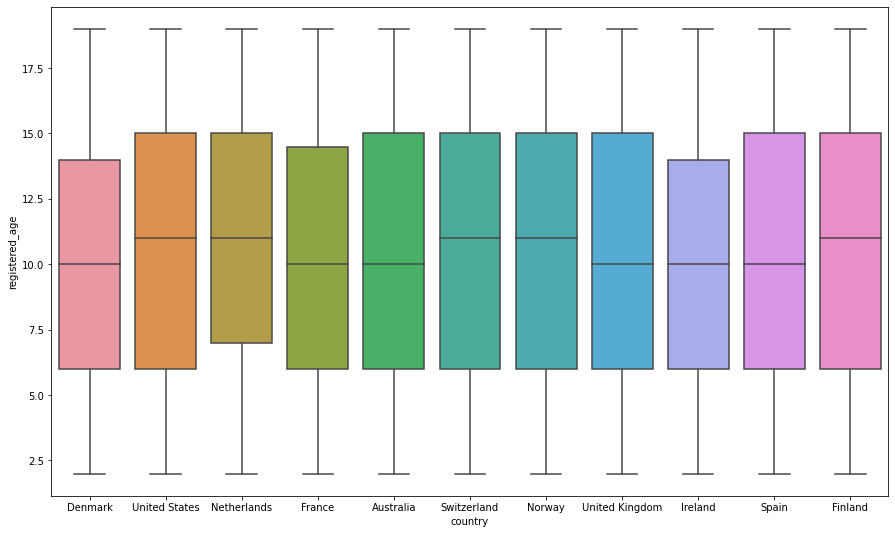

In [60]:


plt.figure(figsize=(15,9))        
sns.boxplot(x="country", y="registered_age", data=data)
plt.show()